# Investment Strategy: A low-volatility and momentum strategy with LSTM neural network 1-day

# Victor Bustos & Marcus Nunes

## Initial Exploratory Analysis

Based on LSTM stock prediction values, we calculate 1-day future returns, analysing SP&500 stocks and selecting the desired stocks to add to the portfolio through a 'low-volatility-momentum' strategy. First we analyze the data history to find a value to the maximum volatility accepted, then we analyze the momentum scores of the stocks using three different periods (21-days, 63-month and 126-month momentum scores), selecting a reasonable momentum threshold in accordance to the distributions of these scores, thereafter selecting some interesting stocks. The final momentum score is calculated by using a weighted momentum average of weigths 0.4 for 21-days momentum and 0.3 for 63-days and 126-days momentum and must be greater than the momentum threshold. We pre-select the stocks to be invested based upon these two criterias: they must pass the volatility and momentum tests and then we get the best 10 stocks momentum scores (this number of stocks can vary if more stocks are necessary).

In this test we chose volatility and momentum thresholds as 0.2 and log(1.1), respectively. The reason for the last choice is that it captures all stocks with an average appreciation of 10%.

  A momentum strategy is a strategy to buy past winners and to sell past losers. It's a bet on the ability of past returns to predict future returns - academic literature has documented evidence that momentum profits are significantly positive and pervasive across multiple time periods.

In [ ]:
from fico.lstm_strategy import *
from modules.load_data import load_data

dict_data = load_data()
sel_stocks = initial_analysis(dict_data)
print("Selected stocks:")
display(sel_stocks)

## Preparing data for model prediction

An example of 60-day windowed Dataframe

First plot presents the returns and second the log-returns

Maximum scale:  0.11079525947570801


,Target Date,Target-60,Target-59,Target-58,Target-57,Target-56,Target-55,Target-54,Target-53,Target-52,...,Target-9,Target-8,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target of Stock
0,2017-11-22,-0.002141,0.003091,0.018404,0.007314,-0.005975,0.000698,0.003772,0.016829,0.013802,...,0.026334,0.000672,-0.001712,0.015068,0.000542,0.009717,0.006604,-0.004934,-0.005018,-0.001858
1,2017-11-24,0.003091,0.018404,0.007314,-0.005975,0.000698,0.003772,0.016829,0.013802,0.004764,...,0.000672,-0.001712,0.015068,0.000542,0.009717,0.006604,-0.004934,-0.005018,-0.001858,0.004490
2,2017-11-27,0.018404,0.007314,-0.005975,0.000698,0.003772,0.016829,0.013802,0.004764,-0.007238,...,-0.001712,0.015068,0.000542,0.009717,0.006604,-0.004934,-0.005018,-0.001858,0.00449,-0.016077
3,2017-11-28,0.007314,-0.005975,0.000698,0.003772,0.016829,0.013802,0.004764,-0.007238,0.009583,...,0.015068,0.000542,0.009717,0.006604,-0.004934,-0.005018,-0.001858,0.00449,-0.016077,-0.012829
4,2017-11-29,-0.005975,0.000698,0.003772,0.016829,0.013802,0.004764,-0.007238,0.009583,0.024845,...,0.000542,0.009717,0.006604,-0.004934,-0.005018,-0.001858,0.00449,-0.016077,-0.012829,0.039126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,2019-06-24,0.025294,0.016326,-0.034094,-0.01711,0.031664,-0.016609,0.02233,-0.028139,0.00135,...,-0.008912,0.006654,-0.000222,-0.002263,0.004817,0.001219,-0.005925,0.00404,-0.005304,-0.021462
397,2019-06-25,0.016326,-0.034094,-0.01711,0.031664,-0.016609,0.02233,-0.028139,0.00135,0.004459,...,0.006654,-0.000222,-0.002263,0.004817,0.001219,-0.005925,0.00404,-0.005304,-0.021462,0.010018
398,2019-06-26,-0.034094,-0.01711,0.031664,-0.016609,0.02233,-0.028139,0.00135,0.004459,0.026222,...,-0.000222,-0.002263,0.004817,0.001219,-0.005925,0.00404,-0.005304,-0.021462,0.010018,-0.004600
399,2019-06-27,-0.01711,0.031664,-0.016609,0.02233,-0.028139,0.00135,0.004459,0.026222,0.008022,...,-0.002263,0.004817,0.001219,-0.005925,0.00404,-0.005304,-0.021462,0.010018,-0.0046,0.007492


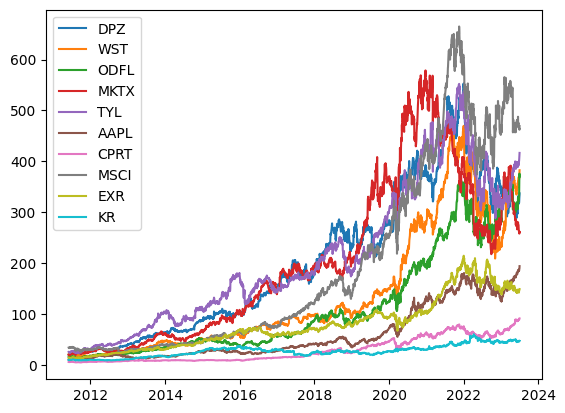

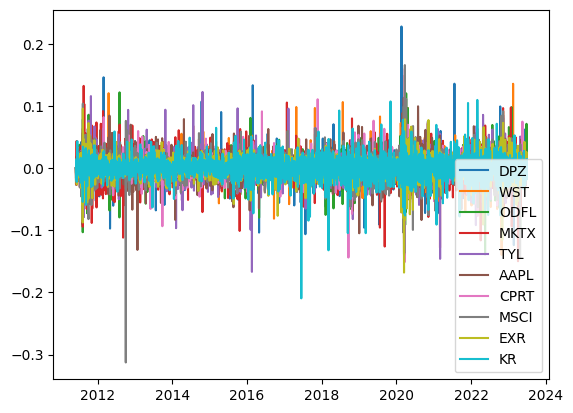

In [2]:
dfs_dict = prepare_model_data(sel_stocks, 2031)
dfs_dict["windowed_dfs"]["DPZ"]

## Stocks Wallet

Returns the wallet and the predicted returns. Shows the real returns just for comparison purpose.

The plots shows the returns predictions for the selected stocks.

MSE: 0.00026931014
MSE: 0.00029258576
MSE: 0.0004974512
MSE: 0.0009667173
MSE: 0.0001967216
MSE: 0.00060348184
MSE: 0.00058716256
MSE: 0.00030953126
MSE: 0.00010871321
MSE: 0.000608835


,ticker,weights,Predicted Returns,Real Returns
2019-07-01,DPZ,0.0126,0.000649,0.001238
2019-07-01,WST,0.1408,0.007221,0.012684
2019-07-01,ODFL,0.3067,0.015728,0.013652
2019-07-01,MKTX,0.0654,0.003356,0.016032
2019-07-01,TYL,0.0722,0.003702,0.013417
2019-07-01,AAPL,0.2110,0.010820,-0.009082
2019-07-01,CPRT,0.0000,-0.015229,0.018811
2019-07-01,MSCI,0.1911,0.009802,0.020016
2019-07-01,EXR,0.0000,-0.001487,0.004654
2019-07-01,KR,0.0000,-0.018503,0.015275


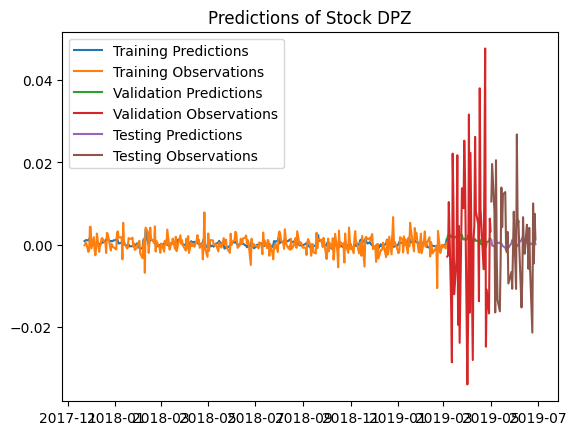

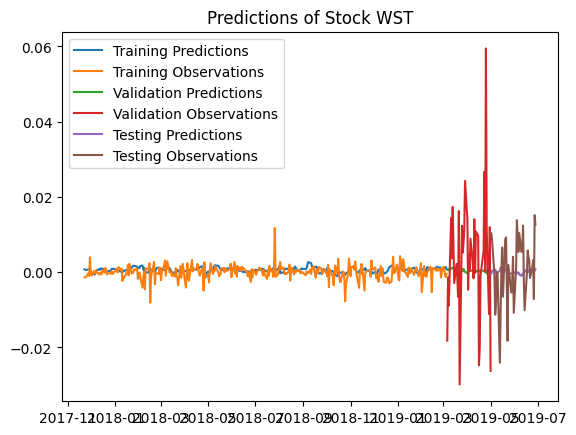

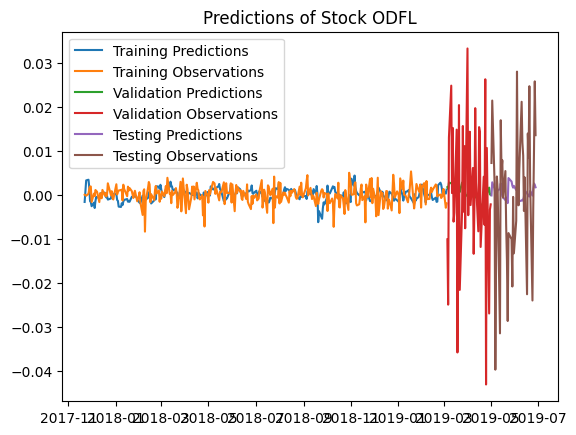

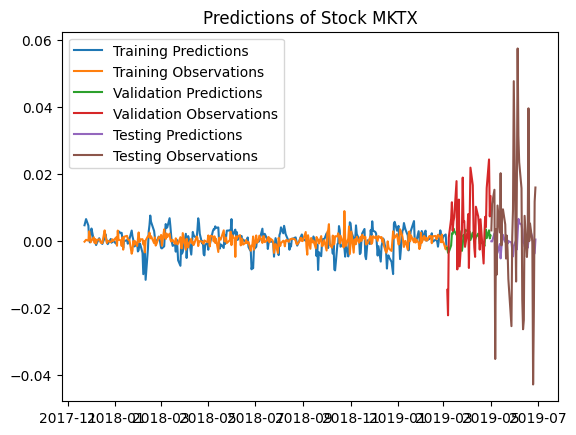

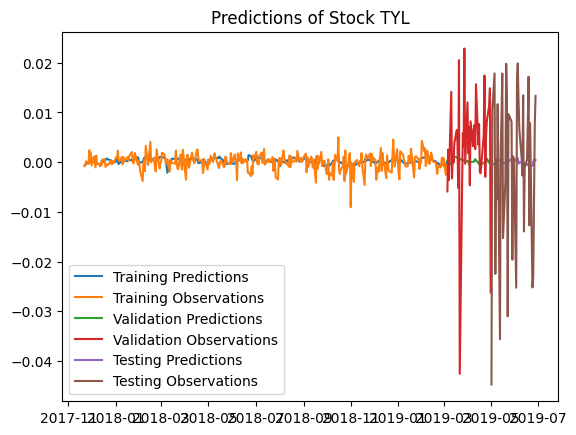

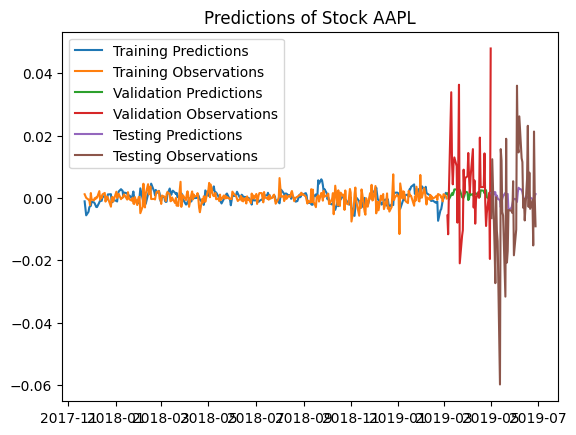

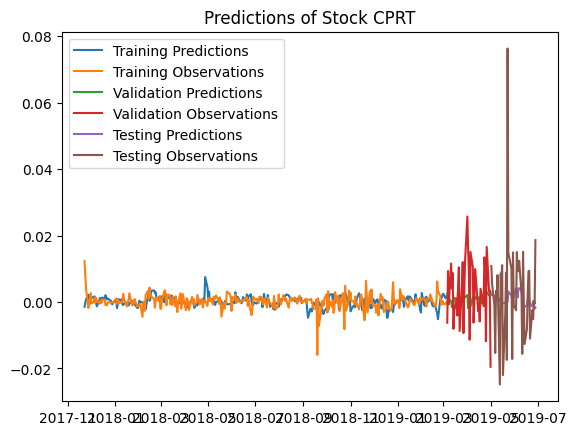

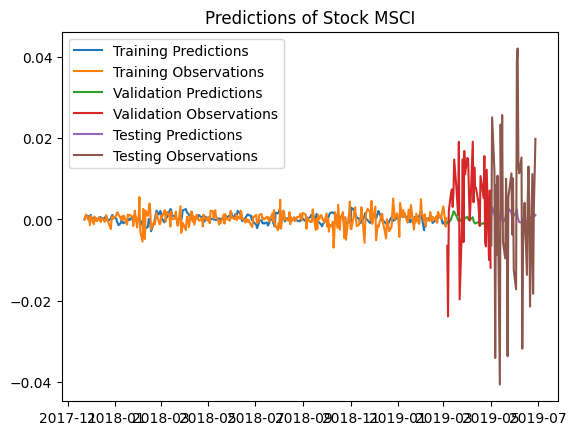

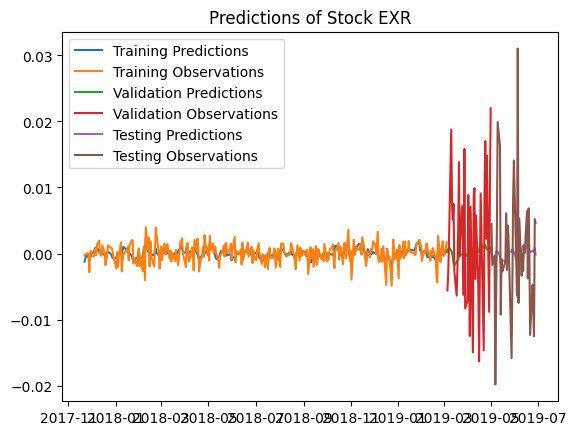

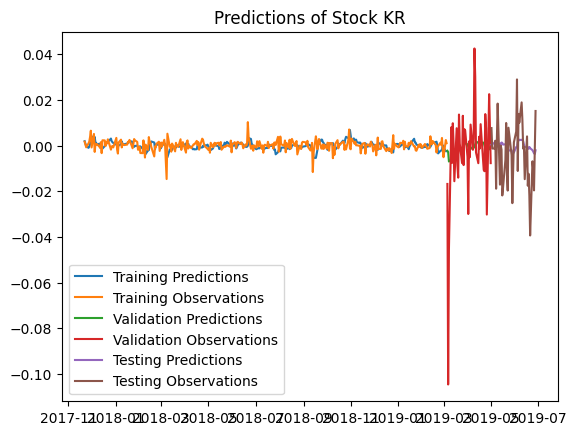

In [3]:
mount_wallet(
    sel_stocks, dfs_dict, dict_data["prices"].index[2032]
)  # t = 2031 corresponds to '2019-06-28', a bit before COVID-19.

## Generate Portfolio Report

Generates tearsheet for the mounted portfolio

In [ ]:
from tqdm import tqdm
import pandas as pd
import fico.lstm_strategy as lstm
from modules.strategy_simulator import strategy_simulator
from modules.load_data import load_data

dict_data = load_data()

# Set the path to the strategy and the strategy itself
path = "../storage/"  # Path to your strategy
strategy = lstm.lstm_strategy  # Your strategy

# Initialize data structures to store results
ret_port = pd.Series(dtype="float64")  # Series to store portfolio returns
weights_db = pd.DataFrame()  # DataFrame to store historical weights

# Loop through a range of time values
for interval in range(
    1100, 1101, 1
):  # Choose interval of backtesting (may last about 5 min to each batch of 5 sets)
    storage = pd.DataFrame({})
    for t in tqdm(
        range(interval, interval + 1)
    ):  # t = 2031 corresponds to '2019-06-28', a bit before COVID-19. That is the date that will be used when more time to run the algorithm is available.
        # Use the strategy simulator to get portfolio's historical weights [weights_db]
        # and its next day returns [ret_port]
        ret_port, weights_db = strategy_simulator(
            path, strategy, dict_data, t, ret_port, weights_db
        )
    storage = pd.DataFrame({"Index": ret_port.index, "Return": ret_port.values})
    storage.to_parquet(
        f"../storage/series_{interval}_{interval+4}.parquet"
    )  # Requires merging all files and removing duplicates

## Portfolio Weights

In [5]:
weights_db = pd.read_parquet("../storage/weights_db.parquet")
display(weights_db)

,ticker,weights,Predicted Returns
2015-10-16,DPZ,0.2102,0.008200
2015-10-16,WST,0.0000,-0.012962
2015-10-16,ODFL,0.0720,0.002809
2015-10-16,MKTX,0.0169,0.000660
2015-10-16,TYL,0.0026,0.000100
2015-10-16,AAPL,0.0000,-0.021456
2015-10-16,CPRT,0.1476,0.005757
2015-10-16,MSCI,0.1896,0.007396
2015-10-16,EXR,0.2285,0.008916
2015-10-16,KR,0.1327,0.005179


In [ ]:
import quantstats as qs
import pandas as pd

storage = pd.read_parquet("../storage/series_500_1034.parquet")  # Insert file path
ret_port = pd.Series(index=storage.index, data=storage["Return"])

qs.extend_pandas()
tear_sheet = qs.reports.html(
    ret_port,
    benchmark="SPY",
    benchmark_title="SPY",
    download_filename="portminrisk.html",
    title="Portfolio Mínimo Risco US - 10 ativos",
)